In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model


In [2]:

# --- Step 1: Load image paths and labels ---
base_dir = '/kaggle/input/skindata2/CancerSkin'
categories = ['Normal', 'Cancer']

image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_dir, category)
    for filename in os.listdir(category_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_paths.append(os.path.join(category_path, filename))
            labels.append(category)

# --- Step 2: Train-test split and label encoding ---
X_train, X_test, y_train, y_test = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


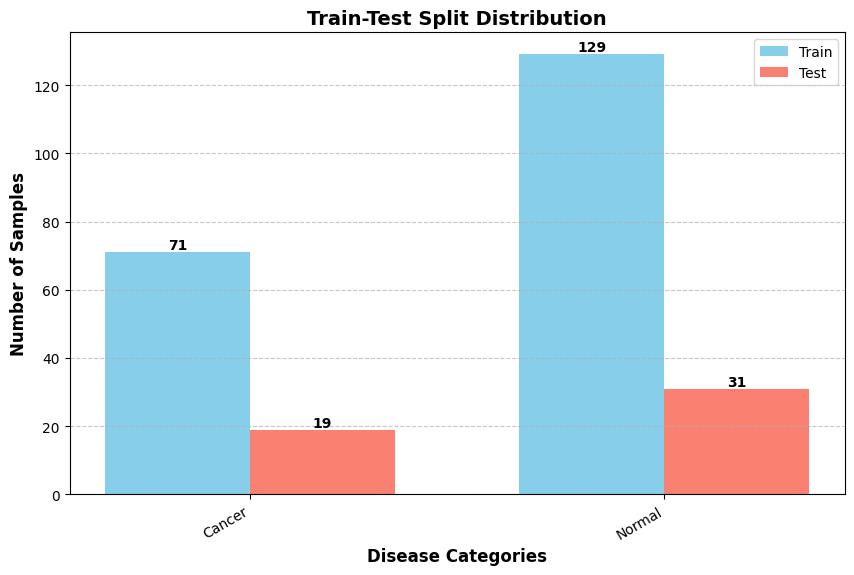

In [3]:

# Define categories (class labels)

categories = list(label_encoder.classes_)

# Count occurrences of each class
train_counts = [np.count_nonzero(y_train == i) for i in range(len(categories))]
test_counts = [np.count_nonzero(y_test == i) for i in range(len(categories))]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(categories))

# Create bars
train_bars = plt.bar(index, train_counts, bar_width, label='Train', color='skyblue')
test_bars = plt.bar(index + bar_width, test_counts, bar_width, label='Test', color='salmon')

# Add numbers on top of bars
for bars in [train_bars, test_bars]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Formatting the plot
plt.xlabel('Disease Categories', fontsize=12, fontweight='bold')  # ✅ Label for x-axis
plt.ylabel('Number of Samples', fontsize=12, fontweight='bold')
plt.title('Train-Test Split Distribution', fontsize=14, fontweight='bold')
plt.xticks(index + bar_width / 2, categories, rotation=30, ha="right", fontsize=10)  # ✅ Class names added
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better readability

plt.show()


# **Thực hiện phân loại ảnh bằng VGG16**

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 81s 11s/step - accuracy: 0.6486 - loss: 14.5715 - val_accuracy: 0.9200 - val_loss: 2.6465
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 72s 10s/step - accuracy: 0.9646 - loss: 0.5015 - val_accuracy: 0.9400 - val_loss: 2.6223
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 71s 10s/step - accuracy: 1.0000 - loss: 1.7904e-04 - val_accuracy: 0.9400 - val_loss: 2.8443
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 72s 11s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9400 - val_loss: 2.9817
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 80s 12s/step - accuracy: 1.0000 - loss: 3.9255e-09 - val_accuracy: 0.9200 - val_loss: 3.0633
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 80s 12s/step - accuracy: 0.9950 - loss: 0.0177 - val_accuracy: 0.9200 - val_loss: 3.3117
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 80s 12s/step - accuracy: 1.0000 - loss: 5.3459e-07 - val_accuracy: 0.9200 - val_loss: 3.5011
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 80s 12s/step - accuracy: 1.0000 - loss: 3.0532e-09 - val_accuracy: 0.920

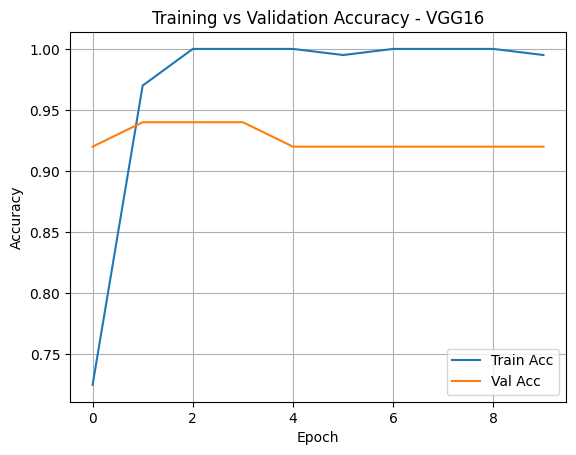

In [4]:
 # Step 1:Load ảnh và chuẩn hóa
def load_images_vgg(image_paths, target_size=(224, 224)):
    images = []
    for path in image_paths:
        img = cv2.imread(path)
        img = cv2.resize(img, target_size)
        img = preprocess_input(img)  # Chuẩn hóa theo VGG16
        images.append(img)
    return np.array(images)

x_train = load_images_vgg(X_train)
x_test = load_images_vgg(X_test)

# Step 2: Create train-test split  
X_train, X_test, y_train, y_test = train_test_split(  
    image_paths,  
    labels,  
    test_size=0.2,  # 20% of data will be used as test set  
    random_state=42,  # For reproducibility 
) 

# Step 3:

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Encoding train labels
y_test = label_encoder.transform(y_test)  # Encoding test labels

# Step 4: Convert to categorical (one-hot encoding)
num_classes = len(label_encoder.classes_)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Step 5: Áp dụng cho train/test
x_train = load_images_vgg(X_train)
x_test = load_images_vgg(X_test)

# --- Step 6: Build VGG16 model ---
# Tải VGG16 mà không gồm top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Không fine-tune base

# Thêm classifier phía trên
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# --- Step 7: Train the model ---
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# --- Step 8: Evaluate the model ---
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n🎯 Test Accuracy VGG16: {test_acc:.4f}")

# Step 9: Vẽ biểu đồ training/validation accuracy

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training vs Validation Accuracy - VGG16")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step


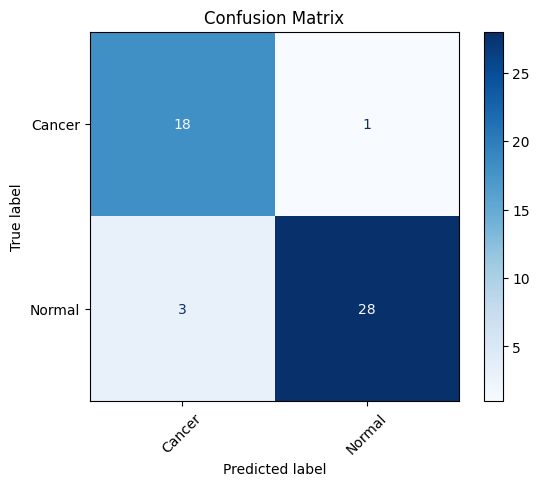

              precision    recall  f1-score   support

      Cancer       0.86      0.95      0.90        19
      Normal       0.97      0.90      0.93        31

    accuracy                           0.92        50
   macro avg       0.91      0.93      0.92        50
weighted avg       0.92      0.92      0.92        50



In [5]:
# Step 1: Predict on the test set
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Step 2: Create the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Step 3: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# Báo cáo phân loại
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))
